In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

import add_features

from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [9]:
c_dir = "E:\\Datasets\\vindish\\"
e_dir = "E:\\Work/Vindish/created_samples/"

In [10]:
df = pd.read_csv(c_dir+"VIX Historical data 10 Min level since 2017 UX1_UX5.csv")

In [11]:
df.head()

,Time_To_Expiration,Date,UX1,UX2,UX3,UX4,UX5,SP500
0,8.9931,08/05/2017 23:30,11.40,12.45,13.68,14.35,15.20,2394.50
1,8.9861,08/05/2017 23:40,11.43,12.45,13.68,14.34,15.18,2394.75
2,8.9792,08/05/2017 23:50,11.43,12.48,13.67,14.30,15.20,2395.00
3,8.9722,09/05/2017,11.43,12.48,13.68,14.30,15.20,2395.00
4,8.9653,09/05/2017 00:10,11.43,12.45,13.68,14.30,15.20,2395.00


In [12]:
# df[df.UX1.isnull()].head()
print(df.shape)
# df = df[(df.UX1.notnull())&(df.UX2.notnull())&(df.UX3.notnull())&(df.UX4.notnull())&(df.UX5.notnull())]
df = df[df.apply(lambda x: x.notnull().all(), axis=1)]
print(df.shape)

(49969, 8)
(49951, 8)


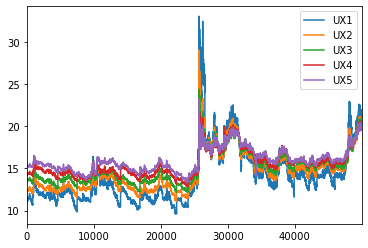

In [13]:
df.iloc[:, 2:7].plot()

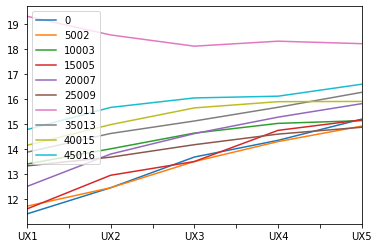

In [14]:
df.iloc[0:50000:5000, 2:7].T.plot()

In [ ]:
df = add_features.drop_rows_with_null_dates(df)

In [ ]:
df.Date = pd.to_datetime(df.Date, dayfirst=True)

In [ ]:
df = pd.concat([df, add_features.from_date_get_dow_dom_doy(df.Date)], axis=1)

In [ ]:
df.head(100)

In [ ]:
diff_cols = [i+"_diff" for i in df.iloc[:, 2:8].columns]
df[diff_cols] = df.iloc[:, 2:8].diff()
df = df.iloc[1:, :]

In [ ]:
df["day_of_month"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df["day_of_year"] = df.Date.dt.dayofyear
df["time_of_day"] = df.Date.dt.hour

In [ ]:
df.memory_usage().sum()//1000000

In [ ]:
rol = df.iloc[:, 2:7].rolling(window=1000)

In [ ]:
x = df.iloc[:11]

In [ ]:
rol.mean().plot()

In [ ]:
ux_vals = x[["UX1", "UX2", "UX3", "UX4", "UX5"]].iloc[:10].values
ux_vals

In [ ]:
df.dow.unique()

In [ ]:
df.head()

In [ ]:
def create_xy_from_df(x, verbose=False):
    x = x.drop("Date", axis=1)
    X = x.iloc[:10, :].values
    y = x[["UX1", "UX2", "UX3", "UX4", "UX5"]].iloc[10].values
    
    return X,y

In [ ]:
%%time
if os.path.exists(e_dir + "X.npy") and os.path.exists(e_dir + "y.npy"):
    X = np.load(e_dir + "X.npy")
    y = np.load(e_dir + "y.npy")
else:    
    Xs = []; ys=[]
    for i in tqdm(np.arange(11, df.shape[0]-1)):
    #     print(df.iloc[(i-11):i, :].shape)
        X, y= create_xy_from_df(df.iloc[(i-11):i, :])
        Xs.append(X)
        ys.append(y)
    X = np.stack(Xs)
    y = np.stack(ys)
    np.save(e_dir + "X.npy", X)
    np.save(e_dir + "y.npy", y)
    np.save(e_dir + "features.npy", np.array([i for i in df.columns if i!="Date"]))

In [ ]:
X.shape, y.shape